In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Look at dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Coding/AERA/Dataset/AERA02_AptitudeAssessment_Dataset_NLP.csv')

In [ ]:
df

,score,title,review
0,5.0,Very good hotel,"Good hotel i have ever stayed in Vietnam, good..."
1,4.0,BUEN ALOJAMIENTO QUE GANARIA MUCHO MEJORANDO E...,Este hotel está muy cerca del barrio de las em...
2,5.0,Great place in Cau Giay,This place was very nice. Our bedroom were cle...
3,5.0,TRẢI NGHIỆM TỐT,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...
4,5.0,Perfect stay,It was a amazing hotel. They helped very good ...
...,...,...,...
1203207,5.0,乾淨整潔，交通方便,位於峴港市區，距離韓江橋或韓市場都不會太遠，店員很熱心，還可以幫忙預訂摩托車跟行程，非常值得...
1203208,5.0,Check this place,My friend and I received excellent and profess...
1203209,5.0,店员给了我们很多帮助，装修简单精致，卫生很好,这是我们此行到越南第一个入住的酒店，也是呆的时间最长的酒店。酒店原本是一家咖啡店，其次楼上有...
1203210,5.0,Công tác,Rất tuyệt vời... khi đến đây tôi cảm giác thoả...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203212 entries, 0 to 1203211
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   score   1039356 non-null  object
 1   title   1039341 non-null  object
 2   review  813848 non-null   object
dtypes: object(3)
memory usage: 27.5+ MB


In [ ]:
df.isna().sum()

score     163856
title     163871
review    389364
dtype: int64

In [ ]:
df.describe()

,score,title,review
count,1039356,1039341,813848
unique,37,533570,783764
top,5.0,The best place to relax,시설이 좀 오래 되어.. 금고랑 샤워기랑 문제가 좀 있었지만
freq,731333,43224,28417


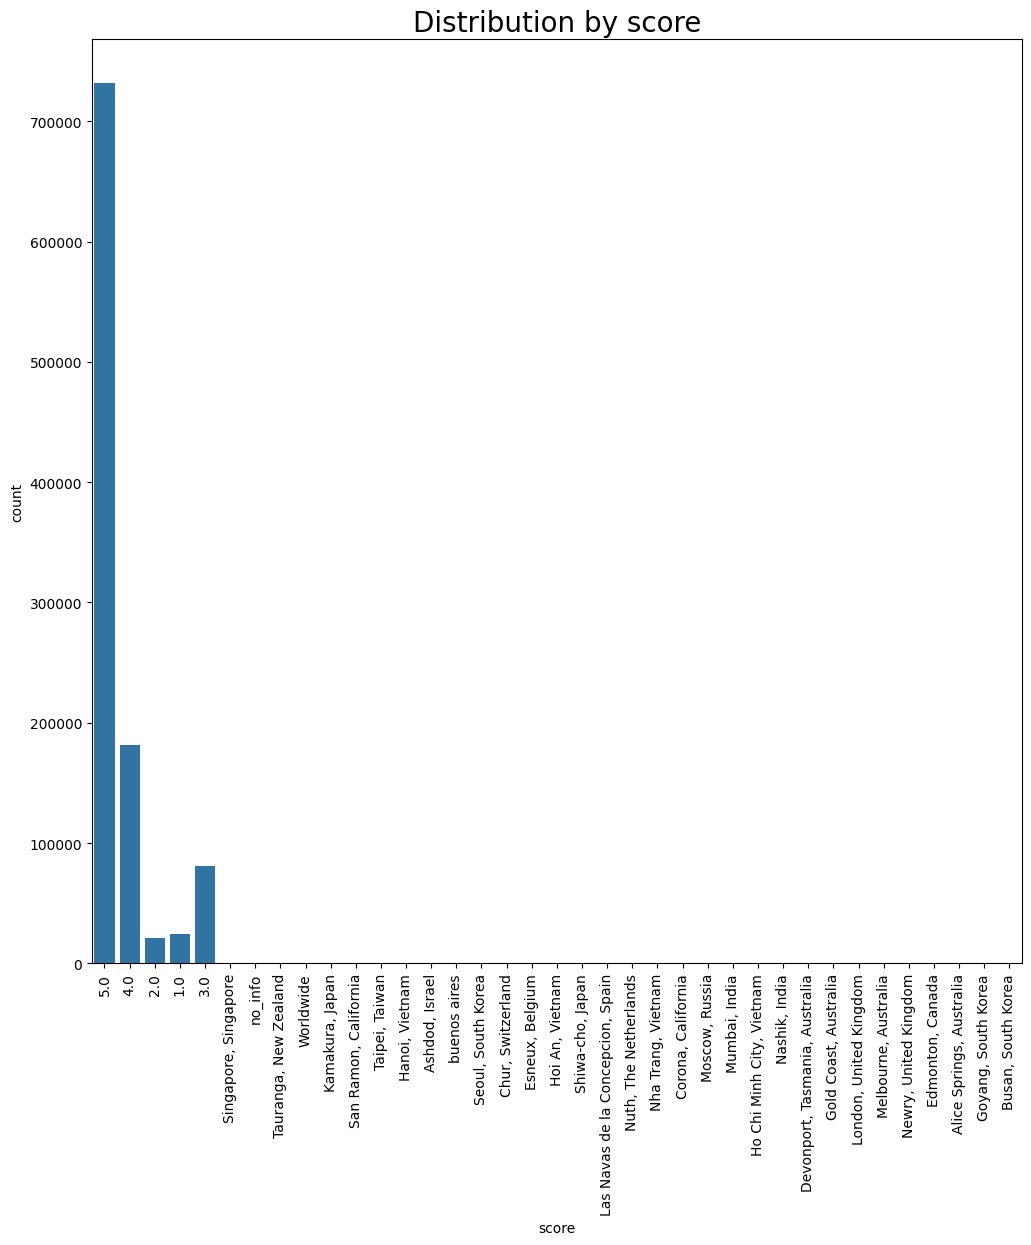

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(data=df, x='score')
plt.xticks(rotation=90)
plt.title('Distribution by score',fontsize = 20)
plt.show()

In [ ]:
df['score'].value_counts()

5.0                                  731333
4.0                                  181832
3.0                                   80816
1.0                                   24123
2.0                                   21088
no_info                                 125
Hanoi, Vietnam                            3
Singapore, Singapore                      3
Ho Chi Minh City, Vietnam                 2
Nha Trang, Vietnam                        2
Seoul, South Korea                        2
Hoi An, Vietnam                           2
Taipei, Taiwan                            1
Mumbai, India                             1
Goyang, South Korea                       1
Alice Springs, Australia                  1
Edmonton, Canada                          1
Newry, United Kingdom                     1
Melbourne, Australia                      1
London, United Kingdom                    1
Gold Coast, Australia                     1
Devonport, Tasmania, Australia            1
Nashik, India                   

In [ ]:
df['title'].value_counts()

The best place to relax                                              43224
Friendly and helpful team of staff                                   29768
SUNSET SUNATO Ở ĐÂY CHỦ YẾU LÀ ĐƯỢC CÁI VỊ TRÍ ĐẸP NGẮM HOÀNG HÔN    29353
여행                                                                   28600
Vinpearl Condotel Beachfront                                         23462
                                                                     ...  
Lovely hotel in an ideal location                                        1
Bello ma....kitsch                                                       1
Sin ser mi estilo, pero muy buen hotel                                   1
Nicest rooms                                                             1
Neu, hübsch eingerichtet, aber einige Mängel                             1
Name: title, Length: 533570, dtype: int64

In [ ]:
df['review'].value_counts()

시설이 좀 오래 되어..   금고랑 샤워기랑 문제가 좀 있었지만                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

Comment:
The dataset contains many hotel reviews and their scores. However, the dataset still has many problems that need to be solved:
* Containing many different languages ​​such as Thai, Korean, English,... while only needing to use Vietnamese reviews.
* The score field not only contains numeric values ​​from 1.0 to 5.0 but also contains location locations such as Busan, Chur,....
* There are some comments repeated many times.


## Language Detection

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=2f6e9ef1aaeb04da1f9ae4925648c82d09b7585fc8c7d2250e572d58b969bbb8
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [ ]:
from langdetect import detect, detect_langs
detect("Ở ĐÂY CHỦ YẾU LÀ ĐƯỢC CÁI VỊ TRÍ ĐẸP NGẮM HOÀNG HÔN 시설이 좀 오래 되어..   금고랑 샤워기랑 문제가 좀 있었지만")

'vi'

In [ ]:
df['content'] = df['title'] + '. ' + df['review']

print(df.columns)

Index(['score', 'title', 'review', 'content'], dtype='object')


In [ ]:
import pandas as pd

In [ ]:
def detect_language(text):
  try:
    language = detect(text)
  except:
    language = 'error'
  return language
df['languages'] = df['content'].apply(detect_language)
print(df)

        score                                              title  \
0         5.0                                   Very good hotel    
1         4.0  BUEN ALOJAMIENTO QUE GANARIA MUCHO MEJORANDO E...   
2         5.0                            Great place in Cau Giay   
3         5.0                                    TRẢI NGHIỆM TỐT   
4         5.0                                       Perfect stay   
...       ...                                                ...   
1203207   5.0                                          乾淨整潔，交通方便   
1203208   5.0                                   Check this place   
1203209   5.0                             店员给了我们很多帮助，装修简单精致，卫生很好   
1203210   5.0                                           Công tác   
1203211   3.0       Neu, hübsch eingerichtet, aber einige Mängel   

                                                    review  \
0        Good hotel i have ever stayed in Vietnam, good...   
1        Este hotel está muy cerca del barrio de las em... 

In [ ]:
df.to_csv('comma_df.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
language_counts = df['languages'].value_counts()
print(language_counts)

en       529621
error    389380
ko        71003
vi        48492
fr        38888
de        25807
ru        22633
ja        18609
es        14564
nl        11387
it         9195
zh-cn      6040
zh-tw      3273
sv         2836
da         2782
pt         2219
th         1478
he         1113
no         1096
pl          861
id          564
fi          391
cs          329
tr          183
ar          104
el           94
hu           79
sk           68
et           56
sl           15
hr           10
so            8
tl            6
ca            6
af            5
fa            4
cy            3
bg            3
sq            2
ur            1
hi            1
ro            1
ta            1
ne            1
Name: languages, dtype: int64


##Drop null values

In [ ]:
df_notnull = df.dropna()

In [ ]:
df_notnull.shape

(813833, 5)

In [ ]:
language_counts_notnull = df_notnull['languages'].value_counts()
print(language_counts_notnull)

en       529621
ko        71003
vi        48492
fr        38888
de        25807
ru        22633
ja        18609
es        14564
nl        11387
it         9195
zh-cn      6040
zh-tw      3273
sv         2836
da         2782
pt         2219
th         1478
he         1113
no         1096
pl          861
id          564
fi          391
cs          329
tr          183
ar          104
el           94
hu           79
sk           68
et           56
sl           15
hr           10
so            8
ca            6
tl            6
af            5
fa            4
cy            3
bg            3
sq            2
ur            1
hi            1
ro            1
ta            1
ne            1
error         1
Name: languages, dtype: int64


In [ ]:
df_notnull.to_csv('comma_df_notnull.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
df_notnull_vie =  df_notnull[df_notnull['languages'] == "vi"]

In [ ]:
print(df_notnull_vie.head)

<bound method NDFrame.head of         score                                  title  \
3         5.0                        TRẢI NGHIỆM TỐT   
8         5.0                              Tuyệt vời   
9         5.0  trải nghiệm tuyệt vời tại Brandi Gate   
16        5.0            Good hotel, good room rates   
64        1.0                          Tồi , lừa đảo   
...       ...                                    ...   
1203166   5.0                     Lần thứ 2 quay lại   
1203191   4.0            Giá rẻ nhân viên thân thiện   
1203194   5.0                     Giá rẻ, đồ ăn ngon   
1203197   5.0  Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng   
1203210   5.0                               Công tác   

                                                    review  \
3        Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...   
8        Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần...   
9        Khách sạn mới 100% tọa lạc trước sông Tô Lịch,...   
16       During the last visit to Hanoi, in April

In [ ]:
df_notnull_vie.shape

(48492, 5)

##Categorize Score

In [ ]:
language_counts_notnull_vie = df_notnull_vie['score'].value_counts()
print(language_counts_notnull_vie)

5.0    40049
4.0     4774
1.0     1509
3.0     1494
2.0      665
Name: score, dtype: int64


In [ ]:
df_notnull_vie.to_csv('vietnamese_results.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
def categorize_score(score):
  if score == '1.0' or score =='2.0':
    return 'negative'
  elif score == '3.0':
    return 'neutral'
  else:
    return 'positive'

df_notnull_vie['category'] = df_notnull_vie['score'].apply(categorize_score)

<ipython-input-53-4cec623414d0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notnull_vie['category'] = df_notnull_vie['score'].apply(categorize_score)


In [ ]:
df_notnull_vie = df_notnull_vie[df_notnull_vie['score'] != 'no_info']

In [ ]:
df_notnull_vie.to_csv('comma_category_vietnamese_results.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/Coding/AERA/Dataset/comma_category_vietnamese_results.csv')

In [ ]:
df_test

,score,title,review,content,languages,category
0,5.0,TRẢI NGHIỆM TỐT,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,TRẢI NGHIỆM TỐT. Đầy đủ dịch vụ tiện nghi Ăn s...,vi,positive
1,5.0,Tuyệt vời,"Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần...","Tuyệt vời. Khách sạn mới, sạch sẽ, có bar và b...",vi,positive
2,5.0,trải nghiệm tuyệt vời tại Brandi Gate,"Khách sạn mới 100% tọa lạc trước sông Tô Lịch,...",trải nghiệm tuyệt vời tại Brandi Gate. Khách s...,vi,positive
3,5.0,"Good hotel, good room rates","During the last visit to Hanoi, in April 2019,...","Good hotel, good room rates. During the last v...",vi,positive
4,1.0,"Tồi , lừa đảo",Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có...,"Tồi , lừa đảo. Mình đặt 2 phòng ở 3 đêm từ 30/...",vi,negative
...,...,...,...,...,...,...
48486,5.0,Lần thứ 2 quay lại,Vừa rồi tham gia cuộc thi sắc đẹp cho doanh nh...,Lần thứ 2 quay lại. Vừa rồi tham gia cuộc thi ...,vi,positive
48487,4.0,Giá rẻ nhân viên thân thiện,Gia đình chúng tôi gồm bố mẹ và 1 bé 4 tuổi đã...,Giá rẻ nhân viên thân thiện. Gia đình chúng tô...,vi,positive
48488,5.0,"Giá rẻ, đồ ăn ngon","Thấy khách sạn lâu rồi mà không dám vào ở, sợ ...","Giá rẻ, đồ ăn ngon. Thấy khách sạn lâu rồi mà ...",vi,positive
48489,5.0,Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng,"Khách sạn với nội thất tuyệt vời , phòng rất r...",Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng. Khách s...,vi,positive


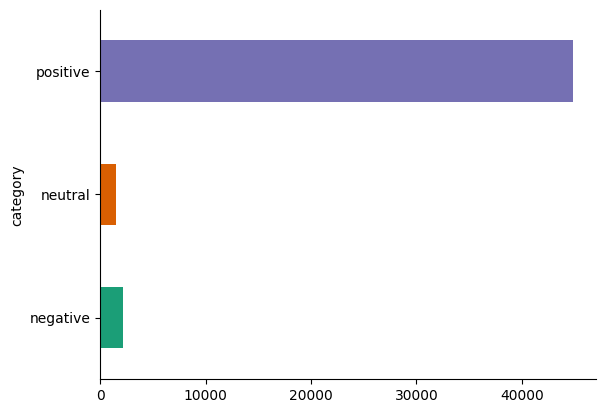

In [ ]:
import seaborn as sns
df_test.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_vie=pd.read_csv('/content/drive/MyDrive/Coding/AERA/Dataset/comma_category_vietnamese_results.csv')

In [ ]:
df_vie

,score,title,review,content,languages,category
0,5.0,TRẢI NGHIỆM TỐT,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,TRẢI NGHIỆM TỐT. Đầy đủ dịch vụ tiện nghi Ăn s...,vi,positive
1,5.0,Tuyệt vời,"Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần...","Tuyệt vời. Khách sạn mới, sạch sẽ, có bar và b...",vi,positive
2,5.0,trải nghiệm tuyệt vời tại Brandi Gate,"Khách sạn mới 100% tọa lạc trước sông Tô Lịch,...",trải nghiệm tuyệt vời tại Brandi Gate. Khách s...,vi,positive
3,5.0,"Good hotel, good room rates","During the last visit to Hanoi, in April 2019,...","Good hotel, good room rates. During the last v...",vi,positive
4,1.0,"Tồi , lừa đảo",Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có...,"Tồi , lừa đảo. Mình đặt 2 phòng ở 3 đêm từ 30/...",vi,negative
...,...,...,...,...,...,...
48486,5.0,Lần thứ 2 quay lại,Vừa rồi tham gia cuộc thi sắc đẹp cho doanh nh...,Lần thứ 2 quay lại. Vừa rồi tham gia cuộc thi ...,vi,positive
48487,4.0,Giá rẻ nhân viên thân thiện,Gia đình chúng tôi gồm bố mẹ và 1 bé 4 tuổi đã...,Giá rẻ nhân viên thân thiện. Gia đình chúng tô...,vi,positive
48488,5.0,"Giá rẻ, đồ ăn ngon","Thấy khách sạn lâu rồi mà không dám vào ở, sợ ...","Giá rẻ, đồ ăn ngon. Thấy khách sạn lâu rồi mà ...",vi,positive
48489,5.0,Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng,"Khách sạn với nội thất tuyệt vời , phòng rất r...",Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng. Khách s...,vi,positive


##Labeling

In [ ]:
def label_category(category):
  if category == 'positive':
    return 2
  elif category == 'negative':
    return '0'
  else:
    return '1'

df_vie['label'] = df_vie['category'].apply(label_category)

In [ ]:
df_vie

,score,title,review,content,languages,category,label
0,5.0,TRẢI NGHIỆM TỐT,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,TRẢI NGHIỆM TỐT. Đầy đủ dịch vụ tiện nghi Ăn s...,vi,positive,2
1,5.0,Tuyệt vời,"Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần...","Tuyệt vời. Khách sạn mới, sạch sẽ, có bar và b...",vi,positive,2
2,5.0,trải nghiệm tuyệt vời tại Brandi Gate,"Khách sạn mới 100% tọa lạc trước sông Tô Lịch,...",trải nghiệm tuyệt vời tại Brandi Gate. Khách s...,vi,positive,2
3,5.0,"Good hotel, good room rates","During the last visit to Hanoi, in April 2019,...","Good hotel, good room rates. During the last v...",vi,positive,2
4,1.0,"Tồi , lừa đảo",Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có...,"Tồi , lừa đảo. Mình đặt 2 phòng ở 3 đêm từ 30/...",vi,negative,0
...,...,...,...,...,...,...,...
48486,5.0,Lần thứ 2 quay lại,Vừa rồi tham gia cuộc thi sắc đẹp cho doanh nh...,Lần thứ 2 quay lại. Vừa rồi tham gia cuộc thi ...,vi,positive,2
48487,4.0,Giá rẻ nhân viên thân thiện,Gia đình chúng tôi gồm bố mẹ và 1 bé 4 tuổi đã...,Giá rẻ nhân viên thân thiện. Gia đình chúng tô...,vi,positive,2
48488,5.0,"Giá rẻ, đồ ăn ngon","Thấy khách sạn lâu rồi mà không dám vào ở, sợ ...","Giá rẻ, đồ ăn ngon. Thấy khách sạn lâu rồi mà ...",vi,positive,2
48489,5.0,Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng,"Khách sạn với nội thất tuyệt vời , phòng rất r...",Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng. Khách s...,vi,positive,2


In [ ]:
df_vie.to_csv('comma_data_final.csv', index=False, sep=',', encoding='utf-8')

##Clear HTML links

In [ ]:
import re

In [ ]:
def remove_html(txt):
    return re.sub(r"http\S+", "", txt)

In [ ]:
df_vie['clean_html_review'] = df_vie['review'].apply(remove_html)

In [ ]:
df_vie

,score,title,review,content,languages,category,label,clean_html_review
0,5.0,TRẢI NGHIỆM TỐT,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,TRẢI NGHIỆM TỐT. Đầy đủ dịch vụ tiện nghi Ăn s...,vi,positive,2,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...
1,5.0,Tuyệt vời,"Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần...","Tuyệt vời. Khách sạn mới, sạch sẽ, có bar và b...",vi,positive,2,"Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần..."
2,5.0,trải nghiệm tuyệt vời tại Brandi Gate,"Khách sạn mới 100% tọa lạc trước sông Tô Lịch,...",trải nghiệm tuyệt vời tại Brandi Gate. Khách s...,vi,positive,2,"Khách sạn mới 100% tọa lạc trước sông Tô Lịch,..."
3,5.0,"Good hotel, good room rates","During the last visit to Hanoi, in April 2019,...","Good hotel, good room rates. During the last v...",vi,positive,2,"During the last visit to Hanoi, in April 2019,..."
4,1.0,"Tồi , lừa đảo",Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có...,"Tồi , lừa đảo. Mình đặt 2 phòng ở 3 đêm từ 30/...",vi,negative,0,Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có...
...,...,...,...,...,...,...,...,...
48486,5.0,Lần thứ 2 quay lại,Vừa rồi tham gia cuộc thi sắc đẹp cho doanh nh...,Lần thứ 2 quay lại. Vừa rồi tham gia cuộc thi ...,vi,positive,2,Vừa rồi tham gia cuộc thi sắc đẹp cho doanh nh...
48487,4.0,Giá rẻ nhân viên thân thiện,Gia đình chúng tôi gồm bố mẹ và 1 bé 4 tuổi đã...,Giá rẻ nhân viên thân thiện. Gia đình chúng tô...,vi,positive,2,Gia đình chúng tôi gồm bố mẹ và 1 bé 4 tuổi đã...
48488,5.0,"Giá rẻ, đồ ăn ngon","Thấy khách sạn lâu rồi mà không dám vào ở, sợ ...","Giá rẻ, đồ ăn ngon. Thấy khách sạn lâu rồi mà ...",vi,positive,2,"Thấy khách sạn lâu rồi mà không dám vào ở, sợ ..."
48489,5.0,Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng,"Khách sạn với nội thất tuyệt vời , phòng rất r...",Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng. Khách s...,vi,positive,2,"Khách sạn với nội thất tuyệt vời , phòng rất r..."


In [ ]:
%cd /content/drive/MyDrive/Coding/AERA/Dataset

/content/drive/MyDrive/Coding/AERA/Dataset


In [ ]:
df_vie = pd.read_csv('/content/drive/MyDrive/Coding/AERA/Dataset/comma_data_final_html.csv')

##Normalize Unicode

In [ ]:
# -*- coding: utf-8 -*-

import regex as re

uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"


def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic


dicchar = loaddicchar()


def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)


In [ ]:
df_vie['convert_unicode'] = df_vie['clean_html_review'].apply(convert_unicode)

In [ ]:
df_vie

,score,title,review,content,languages,category,label,clean_html_review,convert_unicode
0,5.0,TRẢI NGHIỆM TỐT,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,TRẢI NGHIỆM TỐT. Đầy đủ dịch vụ tiện nghi Ăn s...,vi,positive,2,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...
1,5.0,Tuyệt vời,"Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần...","Tuyệt vời. Khách sạn mới, sạch sẽ, có bar và b...",vi,positive,2,"Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần...","Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần..."
2,5.0,trải nghiệm tuyệt vời tại Brandi Gate,"Khách sạn mới 100% tọa lạc trước sông Tô Lịch,...",trải nghiệm tuyệt vời tại Brandi Gate. Khách s...,vi,positive,2,"Khách sạn mới 100% tọa lạc trước sông Tô Lịch,...","Khách sạn mới 100% tọa lạc trước sông Tô Lịch,..."
3,5.0,"Good hotel, good room rates","During the last visit to Hanoi, in April 2019,...","Good hotel, good room rates. During the last v...",vi,positive,2,"During the last visit to Hanoi, in April 2019,...","During the last visit to Hanoi, in April 2019,..."
4,1.0,"Tồi , lừa đảo",Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có...,"Tồi , lừa đảo. Mình đặt 2 phòng ở 3 đêm từ 30/...",vi,negative,0,Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có...,Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có...
...,...,...,...,...,...,...,...,...,...
48486,5.0,Lần thứ 2 quay lại,Vừa rồi tham gia cuộc thi sắc đẹp cho doanh nh...,Lần thứ 2 quay lại. Vừa rồi tham gia cuộc thi ...,vi,positive,2,Vừa rồi tham gia cuộc thi sắc đẹp cho doanh nh...,Vừa rồi tham gia cuộc thi sắc đẹp cho doanh nh...
48487,4.0,Giá rẻ nhân viên thân thiện,Gia đình chúng tôi gồm bố mẹ và 1 bé 4 tuổi đã...,Giá rẻ nhân viên thân thiện. Gia đình chúng tô...,vi,positive,2,Gia đình chúng tôi gồm bố mẹ và 1 bé 4 tuổi đã...,Gia đình chúng tôi gồm bố mẹ và 1 bé 4 tuổi đã...
48488,5.0,"Giá rẻ, đồ ăn ngon","Thấy khách sạn lâu rồi mà không dám vào ở, sợ ...","Giá rẻ, đồ ăn ngon. Thấy khách sạn lâu rồi mà ...",vi,positive,2,"Thấy khách sạn lâu rồi mà không dám vào ở, sợ ...","Thấy khách sạn lâu rồi mà không dám vào ở, sợ ..."
48489,5.0,Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng,"Khách sạn với nội thất tuyệt vời , phòng rất r...",Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng. Khách s...,vi,positive,2,"Khách sạn với nội thất tuyệt vời , phòng rất r...","Khách sạn với nội thất tuyệt vời , phòng rất r..."


##Normalize Vietnamese characters

In [ ]:
bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']

nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)


def vn_word_to_telex_type(word):
    dau_cau = 0
    new_word = ''
    for char in word:
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            new_word += char
            continue
        if y != 0:
            dau_cau = y
        new_word += bang_nguyen_am[x][-1]
    new_word += bang_ky_tu_dau[dau_cau]
    return new_word


def vn_sentence_to_telex_type(sentence):
    """
    Chuyển câu tiếng việt có dấu về kiểu gõ telex.
    :param sentence:
    :return:
    """
    words = sentence.split()
    for index, word in enumerate(words):
        words[index] = vn_word_to_telex_type(word)
    return ' '.join(words)


'\n    End section: Chuyển câu văn về kiểu gõ telex khi không bật Unikey\n'

In [ ]:



def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            # for index2 in nguyen_am_index:
            #     if index2 != index:
            #         x, y = nguyen_am_to_ids[chars[index]]
            #         chars[index2] = bang_nguyen_am[x][0]
            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            # chars[nguyen_am_index[1]] = bang_nguyen_am[x][0]
        else:
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
        # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[2]]]
        # chars[nguyen_am_index[2]] = bang_nguyen_am[x][0]
    return ''.join(chars)


def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True


def chuan_hoa_dau_cau_tieng_viet(sentence):
    """
        Chuyển câu tiếng việt về chuẩn gõ dấu kiểu cũ.
        :param sentence:
        :return:
        """
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        # print(cw)
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)


"""
    End section: Chuyển câu văn về cách gõ dấu kiểu cũ: dùng òa úy thay oà uý
    Xem tại đây: https://vi.wikipedia.org/wiki/Quy_tắc_đặt_dấu_thanh_trong_chữ_quốc_ngữ
"""
if __name__ == '__main__':
    print(chuan_hoa_dau_cau_tieng_viet('anh hoà, đang làm.. gì'))

anh hòa, đang làm.. gì


In [ ]:
df_vie['normalize'] = df_vie['convert_unicode'].apply(chuan_hoa_dau_cau_tieng_viet)

In [ ]:
df_vie

,score,title,review,content,languages,category,label,clean_html_review,convert_unicode,normalize
0,5.0,TRẢI NGHIỆM TỐT,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,TRẢI NGHIỆM TỐT. Đầy đủ dịch vụ tiện nghi Ăn s...,vi,positive,2,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,đầy đủ dịch vụ tiện nghi ăn sáng buffee ngon h...
1,5.0,Tuyệt vời,"Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần...","Tuyệt vời. Khách sạn mới, sạch sẽ, có bar và b...",vi,positive,2,"Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần...","Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần...","khách sạn mới, sạch sẽ, có bar và bể bơi ở tần..."
2,5.0,trải nghiệm tuyệt vời tại Brandi Gate,"Khách sạn mới 100% tọa lạc trước sông Tô Lịch,...",trải nghiệm tuyệt vời tại Brandi Gate. Khách s...,vi,positive,2,"Khách sạn mới 100% tọa lạc trước sông Tô Lịch,...","Khách sạn mới 100% tọa lạc trước sông Tô Lịch,...","khách sạn mới 100% tọa lạc trước sông tô lịch,..."
3,5.0,"Good hotel, good room rates","During the last visit to Hanoi, in April 2019,...","Good hotel, good room rates. During the last v...",vi,positive,2,"During the last visit to Hanoi, in April 2019,...","During the last visit to Hanoi, in April 2019,...","during the last visit to hanoi, in april 2019,..."
4,1.0,"Tồi , lừa đảo",Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có...,"Tồi , lừa đảo. Mình đặt 2 phòng ở 3 đêm từ 30/...",vi,negative,0,Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có...,Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có...,mình đặt 2 phòng ở 3 đêm từ 3011-312 . vì có v...
...,...,...,...,...,...,...,...,...,...,...
48486,5.0,Lần thứ 2 quay lại,Vừa rồi tham gia cuộc thi sắc đẹp cho doanh nh...,Lần thứ 2 quay lại. Vừa rồi tham gia cuộc thi ...,vi,positive,2,Vừa rồi tham gia cuộc thi sắc đẹp cho doanh nh...,Vừa rồi tham gia cuộc thi sắc đẹp cho doanh nh...,vừa rồi tham gia cuộc thi sắc đẹp cho doanh nh...
48487,4.0,Giá rẻ nhân viên thân thiện,Gia đình chúng tôi gồm bố mẹ và 1 bé 4 tuổi đã...,Giá rẻ nhân viên thân thiện. Gia đình chúng tô...,vi,positive,2,Gia đình chúng tôi gồm bố mẹ và 1 bé 4 tuổi đã...,Gia đình chúng tôi gồm bố mẹ và 1 bé 4 tuổi đã...,gia đình chúng tôi gồm bố mẹ và 1 bé 4 tuổi đã...
48488,5.0,"Giá rẻ, đồ ăn ngon","Thấy khách sạn lâu rồi mà không dám vào ở, sợ ...","Giá rẻ, đồ ăn ngon. Thấy khách sạn lâu rồi mà ...",vi,positive,2,"Thấy khách sạn lâu rồi mà không dám vào ở, sợ ...","Thấy khách sạn lâu rồi mà không dám vào ở, sợ ...","thấy khách sạn lâu rồi mà không dám vào ở, sợ ..."
48489,5.0,Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng,"Khách sạn với nội thất tuyệt vời , phòng rất r...",Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng. Khách s...,vi,positive,2,"Khách sạn với nội thất tuyệt vời , phòng rất r...","Khách sạn với nội thất tuyệt vời , phòng rất r...","khách sạn với nội thất tuyệt vời , phòng rất r..."


##Deduplicate

In [ ]:
!sudo apt update
!sudo apt -y install enchant-2

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [773 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,898 kB]
Hit:9 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,356 kB]
Hit:13 https://ppa.launchpadc

In [ ]:
!pip install pyenchant

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 2.2 MB/s eta 0:00:00


In [ ]:
import enchant
eng = enchant.Dict("en_US")

In [ ]:
sent = 'hello, cute vcllll tộc ttrưởng đi đâu chơi đấyyyyyy.'

def remove_dub_char(sentence):
  sentence = str(sentence)
  words = []
  for word in sentence.strip().split():
    if word in teencode_list:
      words.append(word)
      continue
    if eng.check(str(word)):
      words.append(word)
      continue
    words.append(re.sub(r'([A-Z])\1+', lambda m: m.group(1), word, flags = re.IGNORECASE))
  return ' '.join(words)

  # #Tokenize
  # tokens_list = word_tokenize(sentence)
  # for idx, word in enumerate(tokens_list):
  #   if word in teencode_list:
  #     continue
  #   if eng.check(str(word)):
  #     continue
  #   worded = re.sub(r'([A-Z])\1+', lambda m: m.group(1), word, flags = re.IGNORECASE)
  #   if worded != word:
  #     noneed_count += 1
  #   tokens_list[idx] = re.sub(r'([A-Z])\1+', lambda m: m.group(1), word, flags = re.IGNORECASE)

  # tokens_list = word_tokenize()
  # nestList_tokens = rdrsegmenter.tokenize(sentence)
  # for tokens_idx, text_tokens in enumerate(nestList_tokens):
  #   lenn += len(text_tokens)
  #   for idx, word in enumerate(text_tokens):
  #     #Neu tu co trong danh sach teencode thi continue
  #     if word in teencode_list:
  #       continue
  #     if eng.check(str(word)):
  #       continue
  #     text_tokens[idx] = re.sub(r'([A-Z])\1+', lambda m: m.group(1), word, flags = re.IGNORECASE)
  #   nestList_tokens[tokens_idx] = text_tokens

  # MAKE LIST FLAT
  # flat_list = [item for sublist in tokens_list for item in sublist]

  # detokens = MosesDetokenizer().detokenize(tokens_list, return_str=True)

  # return detokens

remove_dub_char(sent)

'helo, cute vcl tộc trưởng đi đâu chơi đấy. Đc c, được luôn. Hahahahahaha ?'

In [ ]:
%cd /content

/content


In [ ]:
# Word segmenter
!pip3 install vncorenlp

# Download VnCoreNLP-1.1.1.jar & its word segmentation component (i.e. RDRSegmenter)
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645932 sha256=339c3e14b2f0bc19096a57bb1512dd2aa2214acd4ad78f8c863a6e7854bf0135
  Stored in directory: /root/.cache/pip/wheels/5d/d9/b3/41f6c6b1ab758561fd4aab55dc0480b9d7a131c6aaa573a3fa
Successfully built vncorenlp
--2024-03-23 11:34:06--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412575 (26M) [application/octet-stream]
Saving to: ‘VnCoreNLP-1.1.1.jar’

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M  --.-KB/s    in 0.1s    

2024-03-23 11:34:07 (184 MB/s) - ‘VnCoreNLP-

In [ ]:
from vncorenlp import VnCoreNLP
rdrsegmenter = VnCoreNLP("/content/vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')

text = "hello, hòa thuận"

word_segmented_text = rdrsegmenter.tokenize(text)
print(type(word_segmented_text))

<class 'list'>


In [ ]:
!pip install underthesea

from underthesea import word_tokenize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 32.7 MB/s eta 0:00:00


##Teencode

In [ ]:
import pandas as pd
teencode_df = pd.read_csv('/content/drive/MyDrive/Coding/AERA/Dataset/teencode.txt',names=['teencode','map'],sep='\t',)
teencode_list = teencode_df['teencode'].to_list()
map_list = teencode_df['map'].to_list()
def searchTeencode(word):
  try:
    global teencode_count
    index = teencode_list.index(word)
    map_word = map_list[index]
    teencode_count += 1
    return map_word
  except:
    pass

##Stopwords

In [ ]:
# stopword = ['bị', 'bởi', 'cả', 'các', 'cái', 'cần', 'càng', 'chỉ', 'chiếc', 'cho', 'chứ', 'chưa', 'chuyện', 'có', 'có_thể', 'cứ',
#             'của', 'cùng', 'cũng', 'đã', 'đang', 'đây', 'để', 'đến_nỗi', 'đều', 'điều', 'do', 'đó', 'được', 'dưới', 'gì', 'khi',
#             'không', 'là', 'lại', 'lên', 'lúc', 'mà', 'mỗi', 'một_cách', 'này', 'nên', 'nếu', 'ngay', 'nhiều', 'như', 'nhưng',
#             'những', 'nơi', 'nữa', 'phải', 'qua', 'ra', 'rằng', 'rất', 'rồi', 'sau', 'sẽ', 'so', 'sự', 'tại', 'theo', 'thì', 'trên',
#             'trước', 'từ', 'từng', 'và', 'vẫn', 'vào', 'vậy', 'vì', 'việc', 'với', 'vừa']

STOPWORDS = '/content/drive/MyDrive/Coding/AERA/Dataset/vietnamese-stopwords-dash.txt'

# features extraction
with open(STOPWORDS, "r") as ins:
    stopword = []
    for line in ins:
        stopword.append(line.strip('\n'))

def remove_stopwords(line):
    global stopword_count
    words = []
    for word in line.strip().split():
        if word not in stopword:
            words.append(word)
        if word in stopword:
            stopword_count += 1
    return ' '.join(words)

# with open(STOPWORDS, "r") as ins:
#     stop_words = []
#     for line in ins:
#         stop_words.append(line.strip('\n'))

##COMBINE TEEEN AND STOPWORD

In [ ]:
stopword_count = 0
teencode_count =0
def stopWords_Teencode(sentence):
  lenn = 0
  sentence = str(sentence)
  #Tokenize
  List_tokens = word_tokenize(sentence,format='text')
  List_tokens = word_tokenize(List_tokens)

  #Teencode
  for tokens_idx, text_tokens in enumerate(List_tokens):
    deteencoded = searchTeencode(text_tokens)
    if (deteencoded != None):
        List_tokens[tokens_idx] = deteencoded

  deteencode_sentence = (" ").join(List_tokens)

  #Stopwords
  tokens_without_sw = remove_stopwords(deteencode_sentence)

  return tokens_without_sw

In [ ]:
sent = 'hoàng gia đẹp trai'

In [ ]:
word_tokenize(sent)

In [ ]:
rdrsegmenter.tokenize(sent)

In [ ]:
stopWords_Teencode(sent)

##DO IT

In [ ]:
stopword_count = 0
teencode_count =0
df_vie['normalize'] = df_vie['normalize'].apply(lambda x:stopWords_Teencode(x))

In [ ]:
teencode_count, stopword_count

(11999, 1383251)

In [ ]:
df_vie

,score,title,review,content,languages,category,label,clean_html_review,convert_unicode,normalize
0,5.0,TRẢI NGHIỆM TỐT,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,TRẢI NGHIỆM TỐT. Đầy đủ dịch vụ tiện nghi Ăn s...,vi,positive,2,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,đầy_đủ dịch_vụ tiện_nghi buffee ngon_hồ bơi đẹ...
1,5.0,Tuyệt vời,"Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần...","Tuyệt vời. Khách sạn mới, sạch sẽ, có bar và b...",vi,positive,2,"Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần...","Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần...","khách_sạn , sạch_sẽ , bar bể bơi tầng_thượng ,..."
2,5.0,trải nghiệm tuyệt vời tại Brandi Gate,"Khách sạn mới 100% tọa lạc trước sông Tô Lịch,...",trải nghiệm tuyệt vời tại Brandi Gate. Khách s...,vi,positive,2,"Khách sạn mới 100% tọa lạc trước sông Tô Lịch,...","Khách sạn mới 100% tọa lạc trước sông Tô Lịch,...","khách_sạn 100 % tọa_lạc sông tô_lịch , cửa_ngõ..."
3,5.0,"Good hotel, good room rates","During the last visit to Hanoi, in April 2019,...","Good hotel, good room rates. During the last v...",vi,positive,2,"During the last visit to Hanoi, in April 2019,...","During the last visit to Hanoi, in April 2019,...","during the last visit to_hanoi , in april 2019..."
4,1.0,"Tồi , lừa đảo",Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có...,"Tồi , lừa đảo. Mình đặt 2 phòng ở 3 đêm từ 30/...",vi,negative,0,Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có...,Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có...,"2 phòng 3 đêm 3011 - 312 . gấp bay 1 phòng , d..."
...,...,...,...,...,...,...,...,...,...,...
48486,5.0,Lần thứ 2 quay lại,Vừa rồi tham gia cuộc thi sắc đẹp cho doanh nh...,Lần thứ 2 quay lại. Vừa rồi tham gia cuộc thi ...,vi,positive,2,Vừa rồi tham gia cuộc thi sắc đẹp cho doanh nh...,Vừa rồi tham gia cuộc thi sắc đẹp cho doanh nh...,"tham_gia thi sắc_đẹp doanh_nhân , 2 hài_lòng 2..."
48487,4.0,Giá rẻ nhân viên thân thiện,Gia đình chúng tôi gồm bố mẹ và 1 bé 4 tuổi đã...,Giá rẻ nhân viên thân thiện. Gia đình chúng tô...,vi,positive,2,Gia đình chúng tôi gồm bố mẹ và 1 bé 4 tuổi đã...,Gia đình chúng tôi gồm bố mẹ và 1 bé 4 tuổi đã...,gia_đình bố_mẹ 1 bé 4 zen diamond suite 1 đêm ...
48488,5.0,"Giá rẻ, đồ ăn ngon","Thấy khách sạn lâu rồi mà không dám vào ở, sợ ...","Giá rẻ, đồ ăn ngon. Thấy khách sạn lâu rồi mà ...",vi,positive,2,"Thấy khách sạn lâu rồi mà không dám vào ở, sợ ...","Thấy khách sạn lâu rồi mà không dám vào ở, sợ ...","khách_sạn dám , sợ giá mãi hôm mời dự tiệc rượ..."
48489,5.0,Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng,"Khách sạn với nội thất tuyệt vời , phòng rất r...",Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng. Khách s...,vi,positive,2,"Khách sạn với nội thất tuyệt vời , phòng rất r...","Khách sạn với nội thất tuyệt vời , phòng rất r...","khách_sạn nội_thất tuyệt_vời , phòng rộng_rãi ..."


In [ ]:
df_vie.to_csv('comma_final_normalized.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_vie, test_size=0.3, random_state=8)
len(train)


33943

In [ ]:
val, test = train_test_split(test, test_size=2/3, random_state=8)

In [ ]:
%cd /content/drive/MyDrive/Coding/AERA/Dataset

/content/drive/MyDrive/Coding/AERA/Dataset


In [ ]:
train.to_csv('train.csv')
val.to_csv('val.csv')
test.to_csv('test.csv')